In [1]:
from commonfunctions import *
import numpy as np
import skimage
import skimage.io as io
import matplotlib.pyplot as plt
from skimage import filters, feature
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle
import cv2 as cv

# Convolution:
from scipy.signal import convolve2d
from scipy import fftpack
import math

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:

from typing import List


def get_largest_contour_list(contour_lists: List[List]) -> List[List]:
    """
    Returns a list containing the contour list with the largest number of contours.
    
    Parameters:
    - contour_lists (List[List]): A list containing multiple lists of contours.

    Returns:
    - List[List]: A list containing the contour list with the maximum number of contours.
    """
    # Handle empty input
    if not contour_lists:
        return []
    if not contour_lists:
        raise ValueError("Input must contain at least one list of contours.")
    
    # Find the list with the maximum number of contours
    largest_contour_list = max(contour_lists, key=len)
    
    # Return as a list containing only the largest contour list
    return [largest_contour_list]

# Function for bright RGB image enhancement
def enhance_bright_image_rgb(image):
    enhanced_image = image.copy()
    for channel in range(3):  # Process R, G, B channels
        for y in range(image.shape[0]):
            for x in range(image.shape[1]):
                pixel_value = image[y, x, channel]
                if 200 <= pixel_value <= 230:
                    # Scale pixel value between 240 and 255
                    enhanced_image[y, x, channel] = 240 + (pixel_value - 200) * (255 - 240) // (230 - 200)
                elif pixel_value > 230:
                    # Keep values above 230 as they are
                    enhanced_image[y, x, channel] = 255
                else:
                    # Keep values below 200 unchanged
                    enhanced_image[y, x, channel] = pixel_value
    return enhanced_image

# Function for dark RGB image enhancement
def enhance_dark_image_rgb(image):
    enhanced_image = image.copy()
    for channel in range(3):  # Process R, G, B channels
        for y in range(image.shape[0]):
            for x in range(image.shape[1]):
                pixel_value = image[y, x, channel]
                if 130 <= pixel_value <= 200:
                    # Scale pixel value between 230 and 255
                    enhanced_image[y, x, channel] = 230 + (pixel_value - 130) * (255 - 230) // (200 - 130)
                elif pixel_value > 200:
                    # Keep values above 200 as they are
                    enhanced_image[y, x, channel] = 255
                else:
                    # Keep values below 130 unchanged
                    enhanced_image[y, x, channel] = pixel_value
    return enhanced_image

def enhance_very_dark_image_rgb(image):
    enhanced_image = image.copy()
    for channel in range(3):  # Process R, G, B channels
        for y in range(image.shape[0]):
            for x in range(image.shape[1]):
                pixel_value = image[y, x, channel]
                if 90 <= pixel_value <= 150:
                    # Scale pixel value between 230 and 250
                    enhanced_image[y, x, channel] = 230 + (pixel_value - 90) * (250 - 230) // (150 - 90)
                elif pixel_value > 150:
                    # Keep values above 150 as they are
                    enhanced_image[y, x, channel] = pixel_value
                else:
                    # Keep values below 90 unchanged
                    enhanced_image[y, x, channel] = pixel_value
    return enhanced_image

def enhance_bright_image(image):
    enhanced_image = image.copy()
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            pixel_value = image[y, x]
            if 200 <= pixel_value <= 230:
                # Scale pixel value between 240 and 255
                enhanced_image[y, x] = 240 + (pixel_value - 200) * (255 - 240) // (230 - 200)
            elif pixel_value > 230:
                # Keep values above 230 as they are
                enhanced_image[y, x] = 255
            else:
                # Keep values below 200 unchanged
                enhanced_image[y, x] = pixel_value
    return enhanced_image

def enhance_dark_image(image):
    enhanced_image = image.copy()
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            pixel_value = image[y, x]
            if 130 <= pixel_value <= 200:
                # Scale pixel value between 230 and 255
                enhanced_image[y, x] = 230 + (pixel_value - 130) * (255 - 230) // (200 - 130)
            elif pixel_value > 200:
                # Keep values above 200 as they are
                enhanced_image[y, x] = 255
            else:
                # Keep values below 130 unchanged
                enhanced_image[y, x] = pixel_value
    return enhanced_image

def calculate_percentage_of_ones(binary_img):
    

    # Calculate the number of 1's
    num_ones = np.count_nonzero(binary_img)

    # Calculate the total number of pixels
    total_pixels = binary_img.size

    # Calculate the percentage of 1's
    percentage_of_ones = (num_ones / total_pixels) * 100

    return percentage_of_ones



# Function for enhancing both dark and bright RGB image enhancement
def enhance_image_rgb(image):
    enhanced_image = image.copy()

    for channel in range(3):  # Process R, G, B channels
        for y in range(image.shape[0]):
            for x in range(image.shape[1]):
                pixel_value = image[y, x, channel]
                
                # Enhance dark to very dark pixel values (90 to 200)
                if 90 <= pixel_value <= 200:
                    if pixel_value <= 130:
                        # Scale very dark pixels between 90 and 150 to 230 to 250
                        enhanced_image[y, x, channel] = 230 + (pixel_value - 90) * (250 - 230) // (150 - 90)
                    elif pixel_value <= 200:
                        # Scale dark pixels between 130 and 200 to 230 to 255
                        enhanced_image[y, x, channel] = 230 + (pixel_value - 130) * (255 - 230) // (200 - 130)
                # Enhance bright pixels (200 to 230 range)
                elif 200 <= pixel_value <= 230:
                    # Scale bright pixels between 200 and 230 to 240 to 255
                    enhanced_image[y, x, channel] = 240 + (pixel_value - 200) * (255 - 240) // (230 - 200)
                elif pixel_value > 230:
                    # Keep values above 230 as they are (already maximized)
                    enhanced_image[y, x, channel] = 255
                else:
                    # Keep values below 90 unchanged (dark/black areas)
                    enhanced_image[y, x, channel] = pixel_value

    return enhanced_image

def enhance_image(image):
    enhanced_image = image.copy()

    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            pixel_value = image[y, x]
                
            # Enhance dark to very dark pixel values (90 to 200)
            if 90 <= pixel_value <= 200:
                if pixel_value <= 130:
                    # Scale very dark pixels between 90 and 150 to 230 to 250
                    enhanced_image[y, x] = 230 + (pixel_value - 90) * (250 - 230) // (150 - 90)
                elif pixel_value <= 200:
                    # Scale dark pixels between 130 and 200 to 230 to 255
                    enhanced_image[y, x] = 230 + (pixel_value - 130) * (255 - 230) // (200 - 130)
            # Enhance bright pixels (200 to 230 range)
            elif 200 <= pixel_value <= 230:
                # Scale bright pixels between 200 and 230 to 240 to 255
                enhanced_image[y, x] = 240 + (pixel_value - 200) * (255 - 240) // (230 - 200)
            elif pixel_value > 230:
                # Keep values above 230 as they are (already maximized)
                enhanced_image[y, x] = 255
            else:
                # Keep values below 90 unchanged (dark/black areas)
                enhanced_image[y, x] = pixel_value

    return enhanced_image

In [3]:
# 1- Get the required RGB color (Using a color picker)
"""
img = cv2.imread('7.jpg')
if img.shape[0] < 800 and img.shape[1] < 600:
    img = cv2.resize(img, (800, 600))
show_images([img])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


brightness = 'd'
if brightness == 'b':
    img = enhance_bright_image_rgb(img)
elif brightness == 'd':
    img = enhance_dark_image_rgb(img)
elif brightness == 'vd':
    img = enhance_very_dark_image_rgb(img)



show_images([gray,img])
"""

"\nimg = cv2.imread('7.jpg')\nif img.shape[0] < 800 and img.shape[1] < 600:\n    img = cv2.resize(img, (800, 600))\nshow_images([img])\ngray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)\n\n\nbrightness = 'd'\nif brightness == 'b':\n    img = enhance_bright_image_rgb(img)\nelif brightness == 'd':\n    img = enhance_dark_image_rgb(img)\nelif brightness == 'vd':\n    img = enhance_very_dark_image_rgb(img)\n\n\n\nshow_images([gray,img])\n"

The percentage of 1's in the image is 86.48%


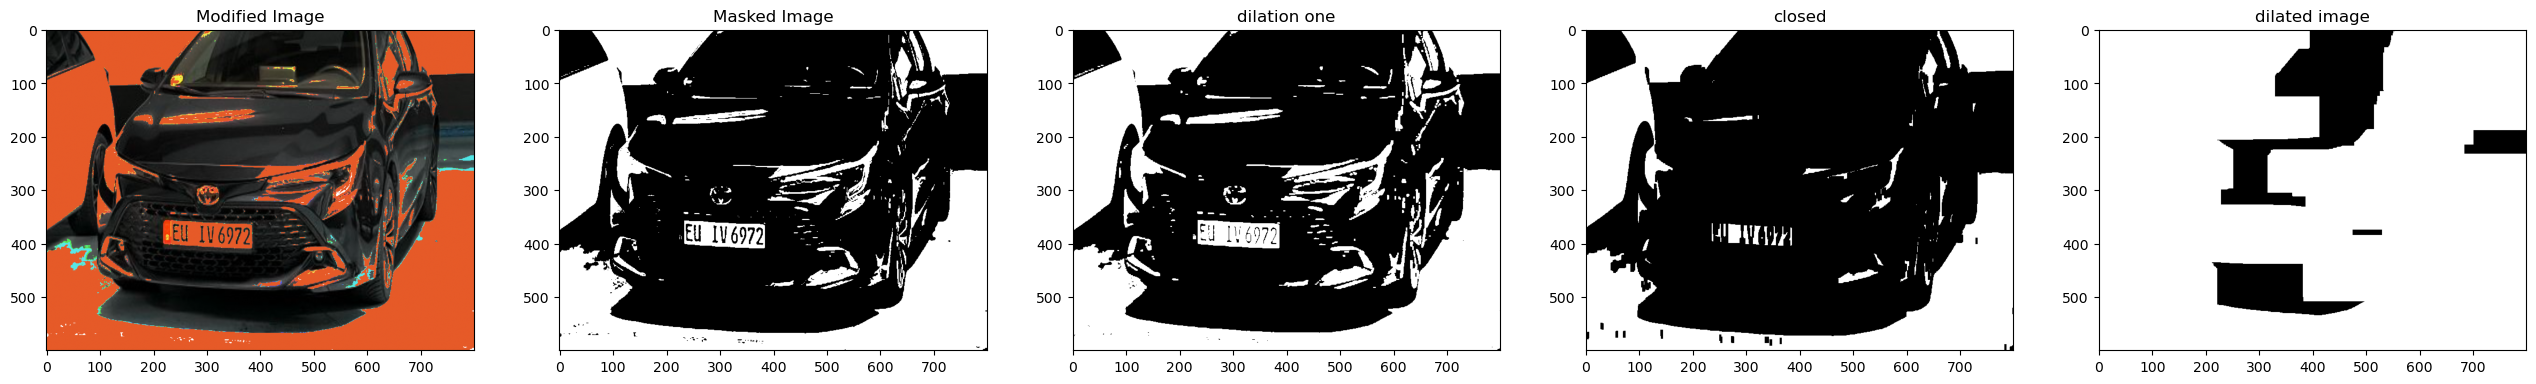

In [4]:
# 1- Get the required RGB color (Using a color picker)
img = cv.imread('input/7.jpg')
if img.shape[0] < 800 and img.shape[1] < 600:
    img = cv.resize(img, (800, 600))


#brightness = 'b'

if len(img.shape) == 3:
    height , width , channel = img.shape
elif len(img.shape) == 2:
    height , width  = img.shape


gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


# if brightness == 'b':
#     img = enhance_bright_image_rgb(img)
# elif brightness == 'd':
#     img = enhance_dark_image_rgb(img)
# elif brightness == 'vd':
#     img = enhance_very_dark_image_rgb(img)

img = enhance_image_rgb(img)



TragetColor = np.array([240/255,240/255,240/255]) 

# 2- Read image

img = img.astype(float) / 255

# 3- Extract R, G, and B channels (as float)
RedChannel = img[:,:,0]
GreenChannel = img[:,:,1]
BlueChannel = img[:,:,2]

# 4- Calculate differences FOR EACH CHANNEL (between the image and the required pixel value)
DiffRed = np.abs(RedChannel - TragetColor[0])
DiffGreen = np.abs(GreenChannel - TragetColor[1])
DiffBlue = np.abs(BlueChannel - TragetColor[2])

# 5- Calculate overall distance from the given RGB color (use Euclidean distance)
Distance = np.sqrt(DiffRed**2 + DiffGreen**2 + DiffBlue**2)

# 6- Create a mask by thresholding the differences
Threshold = 0.1
Mask = np.where(Distance < Threshold , True,False)

# 7- Replace the pixels of the mask with the new color (R=230, G=90, B=40)
ReplacedColor = np.array([230/255, 90/255, 40/255])

# Create a copy of the image to apply the changes
modified_img = np.copy(img)


struct_elem = np.ones((2, 3))
img_dilated1 = binary_dilation(Mask, struct_elem).astype(img.dtype)


struct_elem = np.ones((12, 4))
img_closed = binary_erosion(img_dilated1, struct_elem).astype(img.dtype)

struct_elem = np.ones((70, 180))
img_dilated = binary_dilation(img_closed, struct_elem).astype(img.dtype)

percentageOfOnes   = calculate_percentage_of_ones(img_dilated )
# Apply the new color where the mask is True
modified_img[Mask] = ReplacedColor

print(f"The percentage of 1's in the image is {percentageOfOnes:.2f}%")


show_images([modified_img, Mask, img_dilated1 ,img_closed ,img_dilated], ["Modified Image","Masked Image", "dilation one" , "closed","dilated image"])

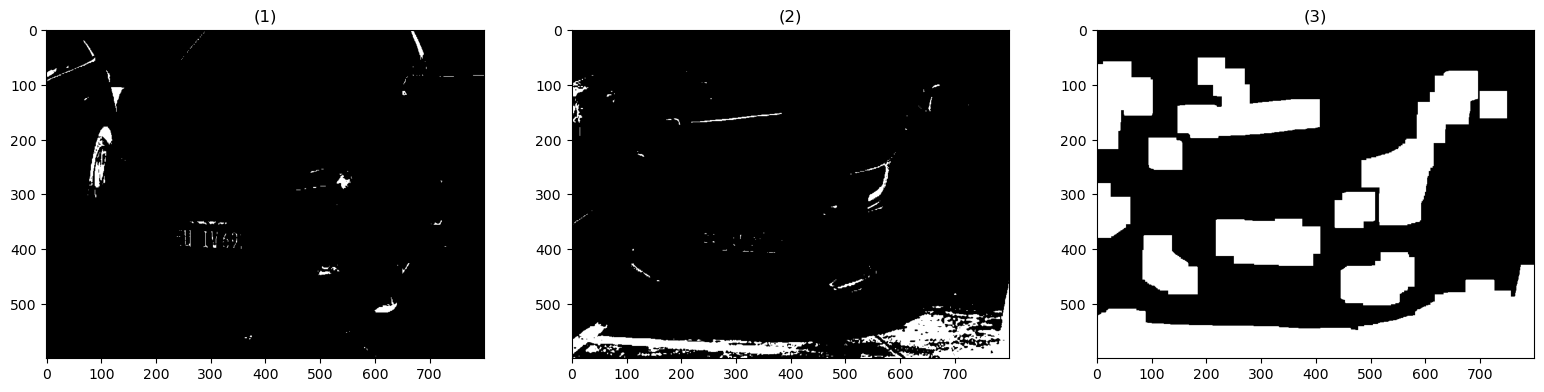

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


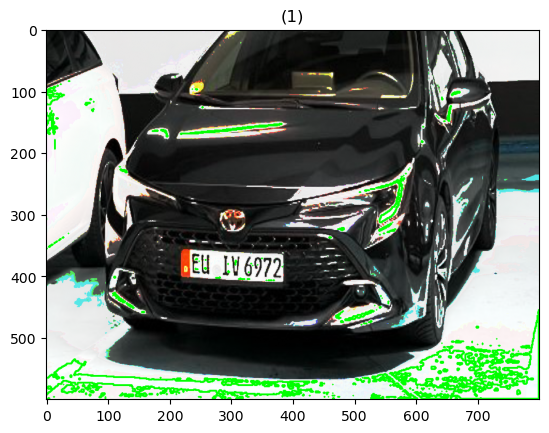

In [5]:
# Convert to binary image using a simple threshold
ret, binary_img = cv.threshold(gray, 210, 255, cv.THRESH_BINARY)
thresholded_img_adaptive = cv.adaptiveThreshold(gray , maxValue=255.0 , adaptiveMethod=cv.ADAPTIVE_THRESH_MEAN_C
                                        ,thresholdType=cv.THRESH_BINARY_INV, blockSize=71,C=71)



struct_elem = np.ones((50,50))
img_Dilatedd_adaptive = binary_dilation(binary_img, struct_elem).astype(img.dtype)








# Show images
show_images([ thresholded_img_adaptive,binary_img, img_Dilatedd_adaptive])

# Optionally, visualize contours on the labeled image
contours, _ = cv.findContours(binary_img, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)
contours_img = cv.drawContours(img.copy(), contours, -1, (0, 255, 0), 2)
show_images([contours_img ])

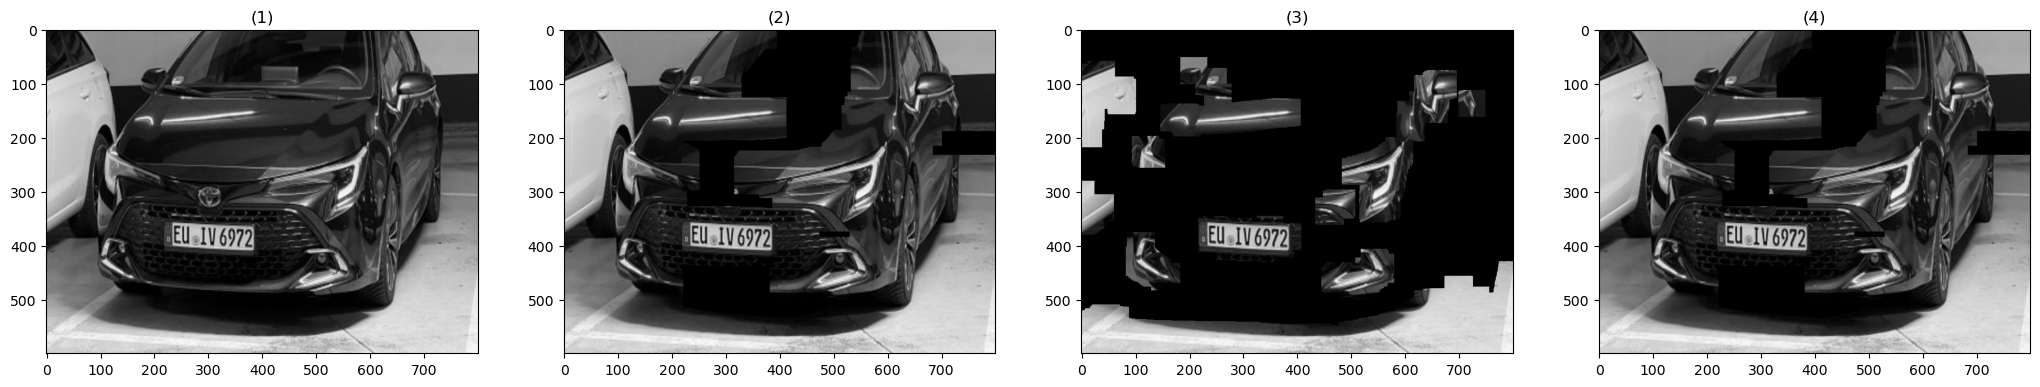

In [6]:
masked_img_dilated = np.zeros_like(gray)  # Create an empty array with the same shape as gray
masked_img_dilated[img_dilated >= 1] = gray[img_dilated >= 1]  # Retain the grayscale values where mask is 255

masked_img_dilated_adaptivaly = np.zeros_like(gray)  # Create an empty array with the same shape as gray
masked_img_dilated_adaptivaly[img_Dilatedd_adaptive >= 1] = gray[img_Dilatedd_adaptive >= 1]  # Retain the grayscale values where mask is 255


if percentageOfOnes >= 90 and percentageOfOnes <91:
    output_img = masked_img_dilated_adaptivaly
elif percentageOfOnes >=99:
    output_img = masked_img_dilated_adaptivaly
else:
    output_img = masked_img_dilated
# Show the original grayscale and the masked grayscale image
show_images([gray ,masked_img_dilated ,masked_img_dilated_adaptivaly , output_img ])




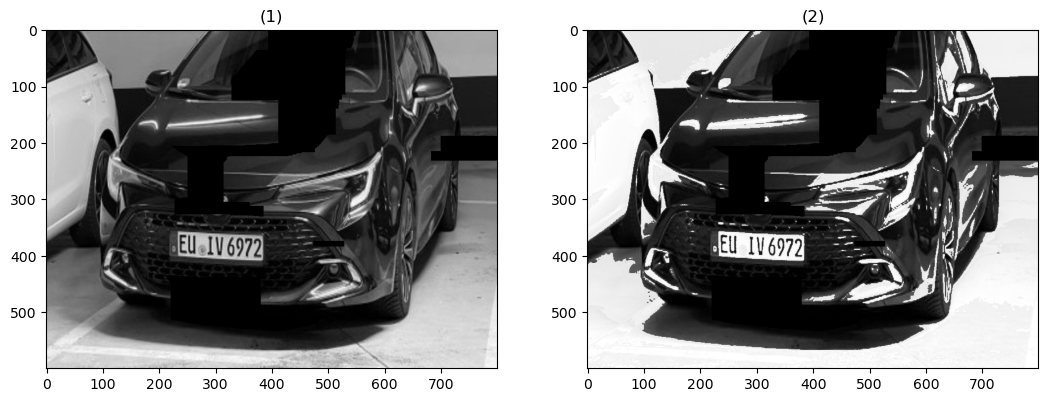

In [7]:
# if brightness == 'b':
#     enhanced_output_img = enhance_bright_image(output_img)
# else:
enhanced_output_img = enhance_image(output_img)


show_images([output_img , enhanced_output_img ])




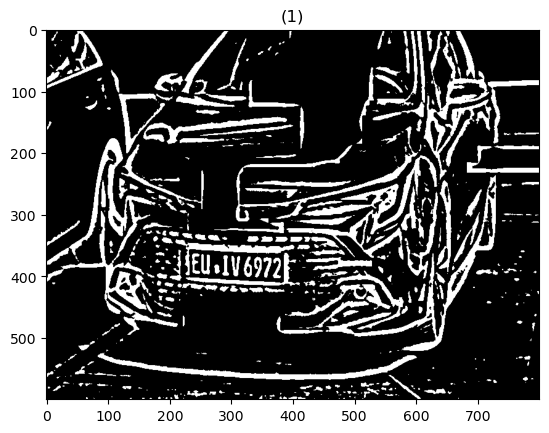

In [8]:
blurred_img = cv.GaussianBlur(output_img , ksize=(5,5) , sigmaX=0)
thresholded_img = cv.adaptiveThreshold(blurred_img , maxValue=255.0 , adaptiveMethod=cv.ADAPTIVE_THRESH_MEAN_C
                                        ,thresholdType=cv.THRESH_BINARY_INV, blockSize=19,C=9)


show_images([thresholded_img  ])



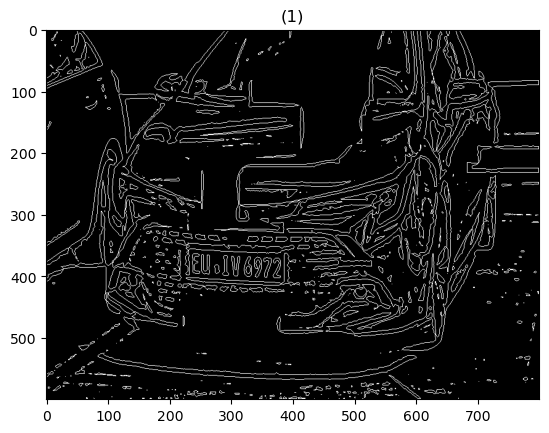

In [9]:



contours ,_ = cv.findContours(thresholded_img , mode = cv.RETR_LIST , method=cv.CHAIN_APPROX_SIMPLE)
temp_result = np.zeros((height,width,channel),dtype=np.uint8)
cv.drawContours(temp_result , contours=contours , contourIdx=-1 , color=(255,255,255))
show_images([temp_result])

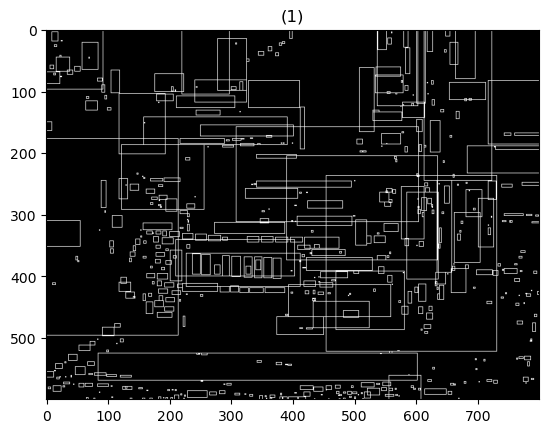

In [10]:
temp_result = np.zeros((height,width,channel),dtype=np.uint8)
contours_dict=[]

for contour in contours:
    x,y,w,h = cv.boundingRect(contour)
    cv.rectangle(temp_result , pt1=(x,y),pt2=(x+w,y+h) , color=(255,255,255) , thickness=1)
    #insert the rectangles into the dict
    contours_dict.append({'contour' : contour , 'x':x,'y':y,'w':w,'h':h ,'cx':x+(w/2),'cy': y+(h/2)})
show_images([temp_result])


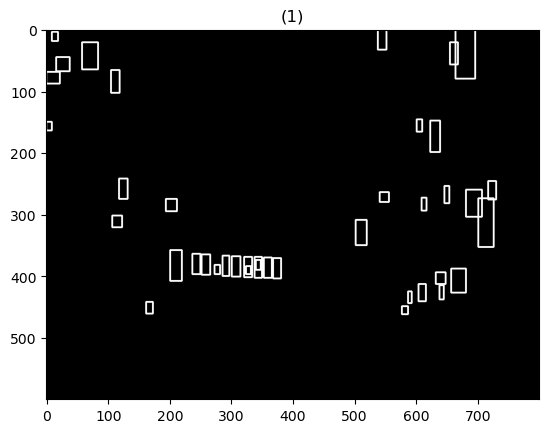

In [11]:
min_area = 100
max_area = 3000
min_width , min_height = 1,5
min_ratio , max_ratio = 0.25 , 1.2

possible_contours = []

cnt = 0

for d in contours_dict:
    area = d['w'] * d['h']
    ratio = d['w'] / d['h']

    if min_area<area <max_area  and d['w'] > min_width and d['h'] > min_height and min_ratio < ratio <max_ratio:
        d['idx'] = cnt
        cnt +=1
        possible_contours.append(d)

temp_result = np.zeros((height,width,channel),dtype=np.uint8)
for d in possible_contours:
    cv.rectangle(temp_result , pt1=(d['x'],d['y']) , pt2=(d['x']+d['w'] , d['y']+d['h']) , color=(255,255,255) , thickness=2)

show_images([temp_result])


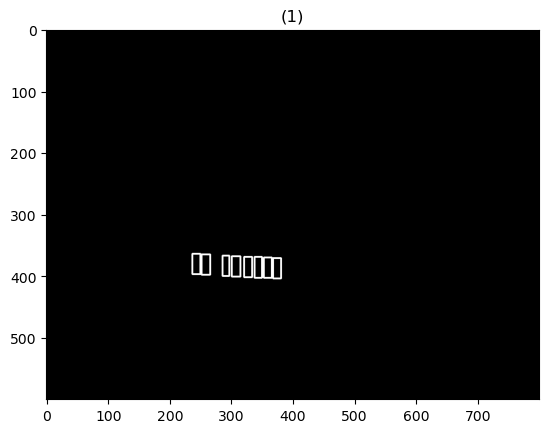

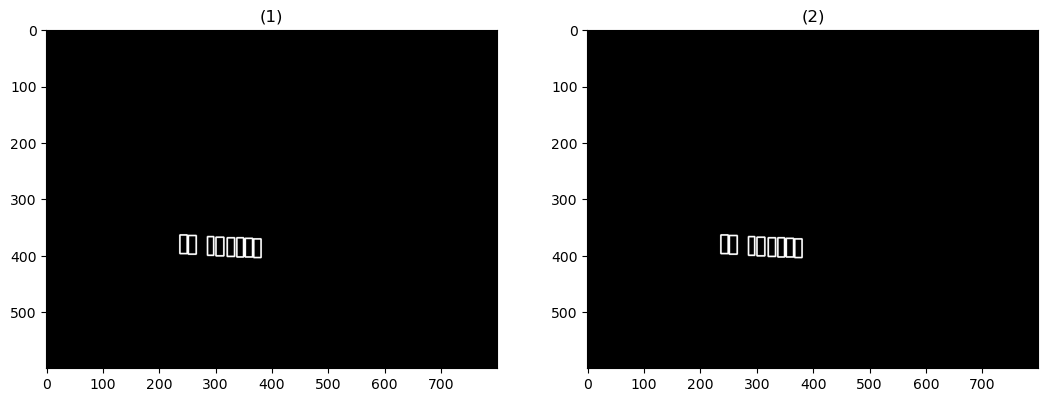

In [12]:
max_diag_multiplyer = 4.2
max_angle_diff = 25.0
max_area_diff = 1.5
max_width_diff = 1.5
max_height_diff = 0.2
min_n_matched = 4

def find_chars(contours_list):
    matched_result_idx = []

    for d1 in contours_list:
        matched_contour_idx = []
        for d2 in contours_list:
            if d1['idx'] == d2['idx']:
                continue

            dx = abs(d1['cx'] - d2['cx'])
            dy = abs(d1['cy'] - d2['cy'])

            diagonal_length = np.sqrt(d1['w']**2 + d1['h']**2)
            distance = np.linalg.norm(np.array([d1['cx'], d1['cy']]) - np.array([d2['cx'], d2['cy']]))

            angle_diff = 90 if dx == 0 else np.degrees(np.arctan(dy / dx))
            
            area_diff = abs((d1['w'] * d1['h'] - d2['w'] * d2['h']) / (d1['w'] * d1['h']))
            width_diff = abs((d1['w'] - d2['w']) / d1['w'])
            height_diff = abs((d1['h'] - d2['h']) / d1['h'])

            if distance < diagonal_length * max_diag_multiplyer and angle_diff < max_angle_diff \
                and area_diff < max_area_diff and width_diff < max_width_diff and height_diff < max_height_diff:
                matched_contour_idx.append(d2['idx'])

        if len(matched_contour_idx) < min_n_matched:
            continue

        matched_result_idx.append([d1['idx']] + matched_contour_idx)

        unmatched_contour_idx = [d4['idx'] for d4 in contours_list if d4['idx'] not in matched_contour_idx]

        if not unmatched_contour_idx:
            break

        unmatched_contour = np.array([d for d in contours_list if d['idx'] in unmatched_contour_idx])
        recursive_contour_list = find_chars(unmatched_contour)

        for idx in recursive_contour_list:
            matched_result_idx.append(idx)

        break

    return matched_result_idx

result_idx = find_chars(possible_contours)

matched_resultx = []

for idx_list in result_idx:
    matched_resultx.append(np.take(possible_contours , idx_list))



temp_resultx = np.zeros((height,width,channel),dtype=np.uint8)
for r in matched_resultx:
    for d in r:
        
        cv.rectangle(temp_resultx , pt1=(d['x'],d['y']) , pt2=(d['x']+d['w'] , d['y']+d['h']) , color=(255,255,255) , thickness=2)
        
show_images([temp_resultx])
temp_result = np.zeros((height,width,channel),dtype=np.uint8)

matched_result = get_largest_contour_list(matched_resultx)

for r in matched_result:
    for d in r:
        
        cv.rectangle(temp_result , pt1=(d['x'],d['y']) , pt2=(d['x']+d['w'] , d['y']+d['h']) , color=(255,255,255) , thickness=2)

show_images([temp_resultx,temp_result])



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


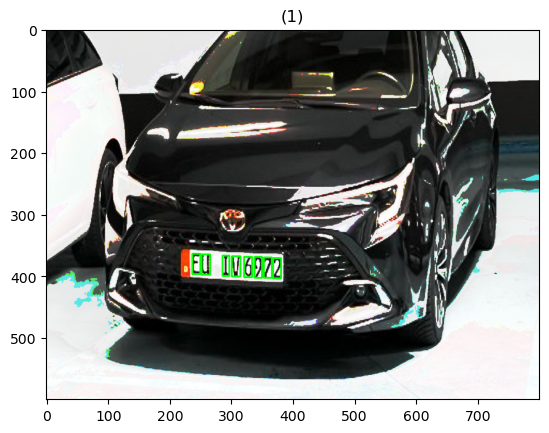

In [13]:
result_idx = find_chars(possible_contours)

matched_resultx = []

for idx_list in result_idx:
    matched_resultx.append(np.take(possible_contours , idx_list))

temp_result = np.zeros((height,width,channel),dtype=np.uint8)


matched_result = get_largest_contour_list(matched_resultx)

temp_result = np.zeros((height,width,channel),dtype=np.uint8)

for r in matched_result:
    for d in r:
        
        cv.rectangle(img , pt1=(d['x'],d['y']) , pt2=(d['x']+d['w'] , d['y']+d['h']) , color=(0,255,0) , thickness=2)

show_images([img])

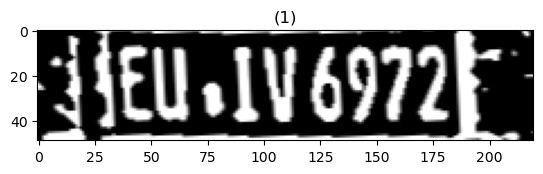

In [14]:
plate_width_padding = 0.6
plate_height_padding = 1.5
min_plate_ratio =1
max_plate_ratio = 2


plate_imgs = []
plate_infos = []

for i , matched_chars in enumerate(matched_result):
    sorted_chars = sorted(matched_chars , key=lambda x : x['cx'])

    plate_cx = (sorted_chars[0]['cx'] + sorted_chars[-1]['cx']) /2
    plate_cy = (sorted_chars[0]['cy'] + sorted_chars[-1]['cy']) /2

    plate_width = (sorted_chars[-1]['x'] + sorted_chars[-1]['w'] - sorted_chars[0]['w'] ) * plate_width_padding

    sum_height = 0
    cropped_imgs = []
    for d in sorted_chars:
        sum_height += d['h']


    plate_height = int(sum_height / len(sorted_chars) * plate_height_padding)

    triangle_height = sorted_chars[-1]['cy'] - sorted_chars[0]['cy']
    triangle_hypotenus = np.linalg.norm(
        np.array([sorted_chars[0]['cx'] , sorted_chars[0]['cy']]) -
        np.array([sorted_chars[-1]['cx'] , sorted_chars[-1]['cy']])
    )

    angle = np.degrees(np.arcsin(triangle_height / triangle_hypotenus))

    rotation_matrix = cv.getRotationMatrix2D(center=(plate_cx , plate_cy) , angle=angle , scale=1.0)

    img_rotated = cv.warpAffine(thresholded_img , M=rotation_matrix , dsize=(width, height))

    img_cropped = cv.getRectSubPix(
        img_rotated,
        patchSize=(int(plate_width) , int(plate_height)),
        center = (int(plate_cx) , int(plate_cy))
    )

    if img_cropped.shape[1] / img_cropped.shape[0] < min_plate_ratio or min_plate_ratio < img_cropped.shape[1] / img_cropped.shape[0] <  max_plate_ratio:
        continue


    plate_imgs.append(img_cropped)
    
    plate_infos.append({
        'x':int(plate_cx - plate_width /2),
        'y':int(plate_cy - plate_height /2),
        'w':int(plate_width),
        'h':int(plate_height)
    })

    show_images([img_cropped])






In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier  # MLP is an NN
from sklearn import svm
import numpy as np
import argparse
import cv2
import os
import random


# Depending on library versions on your system, one of the following imports 
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

path_to_dataset = r'digits_dataset'
target_img_size = (32, 32) # fix image size because classification algorithms THAT WE WILL USE HERE expect that

# We are going to fix the random seed to make our experiments reproducible 
# since some algorithms use pseudorandom generators
random_seed = 42  
random.seed(random_seed)
np.random.seed(random_seed)

In [16]:
def extract_hog_features(img):
    """
    TODO
    You won't implement anything in this function. You just need to understand it 
    and understand its parameters (i.e win_size, cell_size, ... etc)
    """
    img = cv2.resize(img, target_img_size)
    win_size = (32, 32)
    cell_size = (4, 4)
    block_size_in_cells = (2, 2)
    
    block_size = (block_size_in_cells[1] * cell_size[1], block_size_in_cells[0] * cell_size[0])
    block_stride = (cell_size[1], cell_size[0])
    nbins = 9  # Number of orientation bins
    hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)
    h = hog.compute(img)
    h = h.flatten()
    return h.flatten()

In [17]:
def load_dataset():
    features = []
    labels = []

    # Iterate through subfolders (assume folder name is the label)
    for label_folder in os.listdir(path_to_dataset):
        label_path = os.path.join(path_to_dataset, label_folder)
        
        # Ensure it's a directory (skip files)
        if not os.path.isdir(label_path):
            continue
        
        # Extract label from the folder name
        label = label_folder
        
        # Iterate through the images in the folder
        for img_filename in os.listdir(label_path):
            if img_filename.lower().endswith('.jpg'):  # Process only .jpg files
                img_path = os.path.join(label_path, img_filename)
                
                # Read image
                img = cv2.imread(img_path)
                
                # Extract features (e.g., HOG features)
                features.append(extract_hog_features(img))
                
                # Append the label
                labels.append(label)
                
                # Show an update every 1,000 images
                if len(features) % 1000 == 0:
                    print(f"[INFO] Processed {len(features)} images so far.")

    return features, labels


In [18]:
# TODO understand the hyperparameters of each classifier
classifiers = {
    # 'SVM': svm.LinearSVC(random_state=random_seed),
    'KNN': KNeighborsClassifier(n_neighbors=7)
    # 'NN': MLPClassifier(solver='sgd', random_state=random_seed, hidden_layer_sizes=(500,), max_iter=20, verbose=1)
}

In [19]:
# This function will test all our classifiers on a specific feature set
def run_experiment():
    
    # Load dataset with extracted features
    print('Loading dataset. This will take time ...')
    features, labels = load_dataset()
    print('Finished loading dataset.')
    
    # Since we don't want to know the performance of our classifier on images it has seen before
    # we are going to withhold some images that we will test the classifier on after training 
    train_features, test_features, train_labels, test_labels = train_test_split(
        features, labels, test_size=0.2, random_state=random_seed)
    
    for model_name, model in classifiers.items():
        print('############## Training', model_name, "##############")
        # Train the model only on the training features
        model.fit(train_features, train_labels)
        
        # Test the model on images it hasn't seen before
        accuracy = model.score(test_features, test_labels)
        
        print(model_name, 'accuracy:', accuracy*100, '%')

In [20]:
run_experiment()
"""
You should get the following test accuracies the first time 

SVM accuracy ~ 97.70833333333333
KNN accuracy ~ 96.52777777777779
NN accuracy ~ 93.95833333333333
"""

Loading dataset. This will take time ...
[INFO] Processed 1000 images so far.
[INFO] Processed 2000 images so far.
[INFO] Processed 3000 images so far.
[INFO] Processed 4000 images so far.
[INFO] Processed 5000 images so far.
[INFO] Processed 6000 images so far.
[INFO] Processed 7000 images so far.
[INFO] Processed 8000 images so far.
[INFO] Processed 9000 images so far.
[INFO] Processed 10000 images so far.
[INFO] Processed 11000 images so far.
[INFO] Processed 12000 images so far.
[INFO] Processed 13000 images so far.
[INFO] Processed 14000 images so far.
[INFO] Processed 15000 images so far.
[INFO] Processed 16000 images so far.
[INFO] Processed 17000 images so far.
[INFO] Processed 18000 images so far.
[INFO] Processed 19000 images so far.
[INFO] Processed 20000 images so far.
[INFO] Processed 21000 images so far.
[INFO] Processed 22000 images so far.
[INFO] Processed 23000 images so far.
[INFO] Processed 24000 images so far.
[INFO] Processed 25000 images so far.
[INFO] Processed 2

'\nYou should get the following test accuracies the first time \n\nSVM accuracy ~ 97.70833333333333\nKNN accuracy ~ 96.52777777777779\nNN accuracy ~ 93.95833333333333\n'

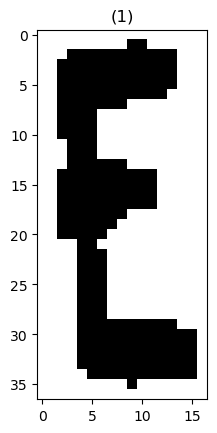

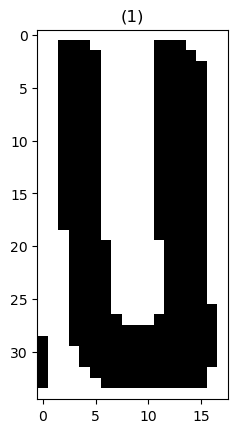

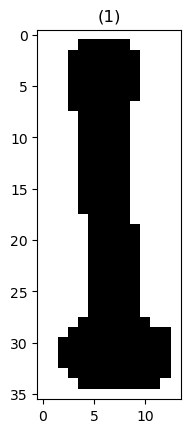

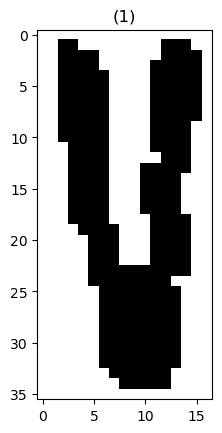

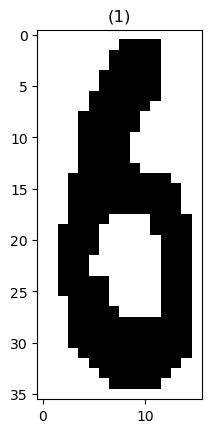

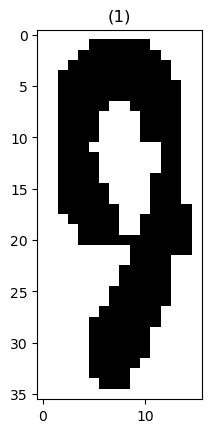

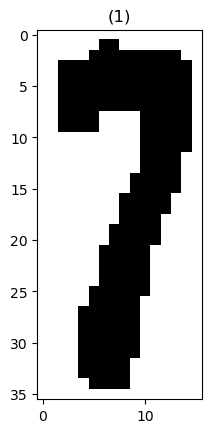

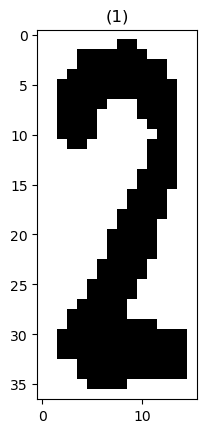

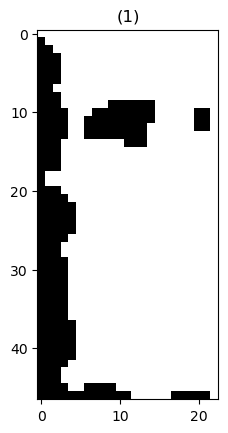

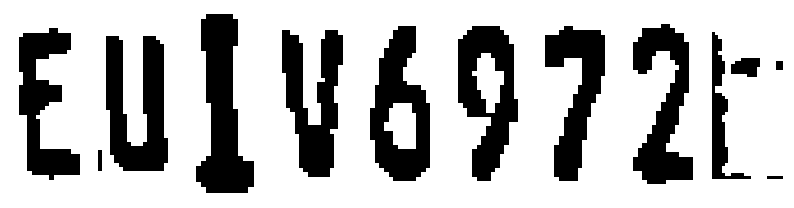

In [ ]:

def segment_characters(image, output_directory):
    """
    Segments characters from an image and saves them as individual images.

    Args:
        image_path (str): Path to the input image.
        output_directory (str): Directory to save the segmented character images.

    Returns:
        list: List of segmented character images as numpy arrays.
    """

    image = cv2.dilate(image, np.ones((2, 2), np.uint8), iterations=1)

    # Find contours of the content
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Find the bounding box of the largest contour (assumed to be the main content)
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Crop the image to the bounding box
    image = image[y:y+h, x:x+w]

    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpened = cv2.filter2D(image, -1, kernel)

    # Perform binary erosion
    binary_image = cv2.erode(sharpened, np.ones((3, 2), np.uint8), iterations=1)
    
    # Apply binary thresholding
    _, binary_image = cv2.threshold(binary_image, 150, 255, cv2.THRESH_BINARY_INV)
    binary_image = cv2.erode(binary_image, np.ones((3, 2), np.uint8), iterations=1)
    
    # Find contours of the characters
    contours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Sort contours from left to right
    sorted_contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

    # Initialize list to store segmented characters
    segmented_characters = []
    
    width, height = binary_image.shape

    # Loop through contours and extract individual characters
    for i, contour in enumerate(sorted_contours):
        x, y, w, h = cv2.boundingRect(contour)
        # Filter out small contours
        if w > width/8 and h > height/10 and w < width*7/8:
            char_image = binary_image[y:y+h, x:x+w]
            # Perform binary erosion
            char_image = cv2.dilate(char_image, np.ones((1, 2), np.uint8), iterations=2)
            segmented_characters.append(char_image)
            show_images([char_image])
            # Save the segmented character image
            cv2.imwrite(f"{output_directory}/char_{i}.png", char_image)

    return segmented_characters

img = img_cropped
output_directory = "/mnt/data/segmented_chars"
segmented_characters = segment_characters(img, output_directory)
# Display segmented characters
plt.figure(figsize=(10, 5))
for i, char_image in enumerate(segmented_characters):
    plt.subplot(1, len(segmented_characters), i + 1)
    plt.imshow(char_image, cmap='gray')
    plt.axis("off")
    
plt.show()


In [40]:
knn = classifiers['KNN']

for i, char_image in enumerate(segmented_characters):
    features = extract_hog_features(char_image)
    print(knn.predict([features]))

['E']
['U']
['I']
['V']
['5']
['9']
['1']
['2']
['L']
